In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_dataframe(path: str) -> pd.DataFrame:
    dfs = []
    for filename in os.listdir(path):
        if filename.endswith(".csv"):
            filepath = os.path.join(path, filename)
            df = pd.read_csv(filepath)
            dfs.append(df)
    df = pd.concat(dfs, ignore_index=True)
    df["from_date"] = pd.to_datetime(df["from_date"])
    df["to_date"] = pd.to_datetime(df["to_date"])
    df["visit_date"] = df["from_date"].dt.date
    return df

## Prepare Simple Test Case

In [3]:
df_simple = get_dataframe("datasets/simple_test_case/")
df_simple.head()

,id,gender,age,count,from_date,to_date,visit_date
0,0,man,young,3,2024-01-08 08:00:00,2024-01-08 09:00:00,2024-01-08
1,1,man,adult,28,2024-01-08 08:00:00,2024-01-08 09:00:00,2024-01-08
2,2,man,old,10,2024-01-08 08:00:00,2024-01-08 09:00:00,2024-01-08
3,3,woman,young,5,2024-01-08 08:00:00,2024-01-08 09:00:00,2024-01-08
4,4,woman,adult,44,2024-01-08 08:00:00,2024-01-08 09:00:00,2024-01-08


In [4]:
df_simple["visit_date"].value_counts()

visit_date
2024-01-08    84
2024-01-09    84
2024-01-10    84
2024-01-11    84
2024-01-12    84
2024-01-13    84
2024-01-14    84
2024-01-15    84
Name: count, dtype: int64

In [5]:
df_simple.isna().sum()

id            0
gender        0
age           0
count         0
from_date     0
to_date       0
visit_date    0
dtype: int64

### Conclusions 
The dataset contains records for every hour spanning from 8:00 to 22:00 across six distinct age/gender groups for 8 consecutive days. The records have no null values. The data is consistent and ready for further analysis without any additional preparation steps.

## Analyze Simple Test Case

In [6]:
def calculate_daily_visits(df: pd.DataFrame) -> pd.DataFrame:
    return df.groupby("visit_date")["count"].sum().reset_index()


def show_daily_visits(df: pd.DataFrame, title: str) -> None:
    plt.figure(figsize=(10, 6))
    plt.bar(df["visit_date"], df["count"])
    plt.title(f"Daily Store Visits - {title}")
    plt.xlabel("Date")
    plt.ylabel("Visits")
    plt.xticks(df["visit_date"], rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

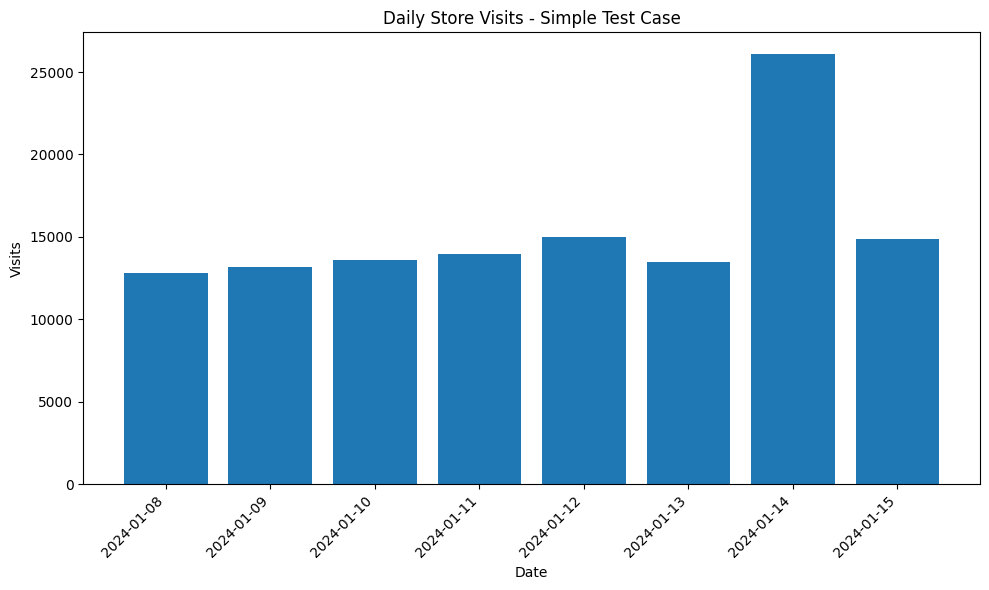

In [7]:
daily_visits = calculate_daily_visits(df_simple)
show_daily_visits(daily_visits, "Simple Test Case")

In [8]:
def calculate_gender_repartition(df: pd.DataFrame) -> pd.DataFrame:
    gender_repartition = (
        df.groupby(["visit_date", "gender"])["count"].sum().reset_index()
    )
    gender_repartition_pivot = gender_repartition.pivot(
        index="visit_date", columns="gender", values="count"
    )
    gender_repartition_pivot["Total"] = gender_repartition_pivot.sum(axis=1)
    gender_repartition_pivot["Man %"] = (
        gender_repartition_pivot["man"] / gender_repartition_pivot["Total"] * 100
    )
    gender_repartition_pivot["Woman %"] = (
        gender_repartition_pivot["woman"] / gender_repartition_pivot["Total"] * 100
    )
    return gender_repartition_pivot


def show_gender_repartition(df: pd.DataFrame, title: str) -> None:
    ax = df[["Man %", "Woman %"]].plot(kind="bar", stacked=True, figsize=(10, 6))
    plt.title(f"Gender Repartition - {title}")
    plt.xlabel("Date")
    plt.ylabel("Percentage of Visits")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Gender Category")
    plt.tight_layout()
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(
            f"{height:.1f}%",
            (x + width / 2, y + height),
            rotation=90,
            ha="center",
            va="top",
        )
    plt.show()

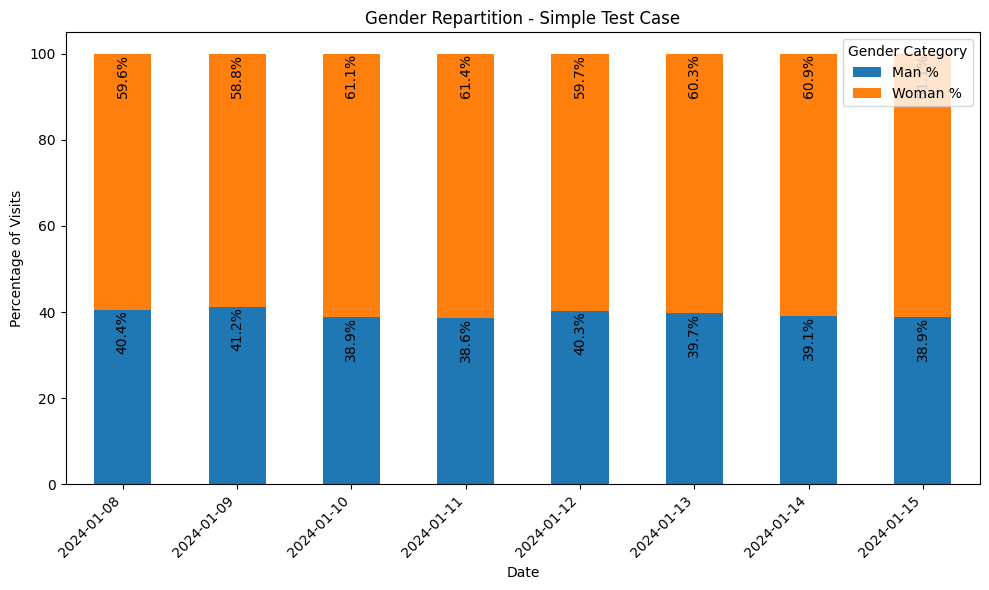

In [9]:
gender_repartition = calculate_gender_repartition(df_simple)
show_gender_repartition(gender_repartition, "Simple Test Case")

In [10]:
def calculate_age_proportion(df: pd.DataFrame) -> pd.DataFrame:
    age_repartition = df.groupby(["visit_date", "age"])["count"].sum().reset_index()
    age_repartition_pivot = age_repartition.pivot(
        index="visit_date", columns="age", values="count"
    )

    age_repartition_pivot["Total"] = age_repartition_pivot.sum(axis=1)
    age_repartition_pivot["Young %"] = (
        age_repartition_pivot["young"] / age_repartition_pivot["Total"] * 100
    )
    age_repartition_pivot["Adult %"] = (
        age_repartition_pivot["adult"] / age_repartition_pivot["Total"] * 100
    )
    age_repartition_pivot["Old %"] = (
        age_repartition_pivot["old"] / age_repartition_pivot["Total"] * 100
    )
    return age_repartition_pivot


def show_age_proportion(df: pd.DataFrame, title: str) -> None:
    ax = df[["Young %", "Adult %", "Old %"]].plot(
        kind="bar", stacked=True, figsize=(10, 6)
    )
    plt.title(f"Age Proportion - {title}")
    plt.xlabel("Date")
    plt.ylabel("Percentage of Visits")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Age Category")
    plt.tight_layout()
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(
            f"{height:.1f}%",
            (x + width / 2, y + height),
            rotation=90,
            ha="center",
            va="top",
        )

    plt.show()

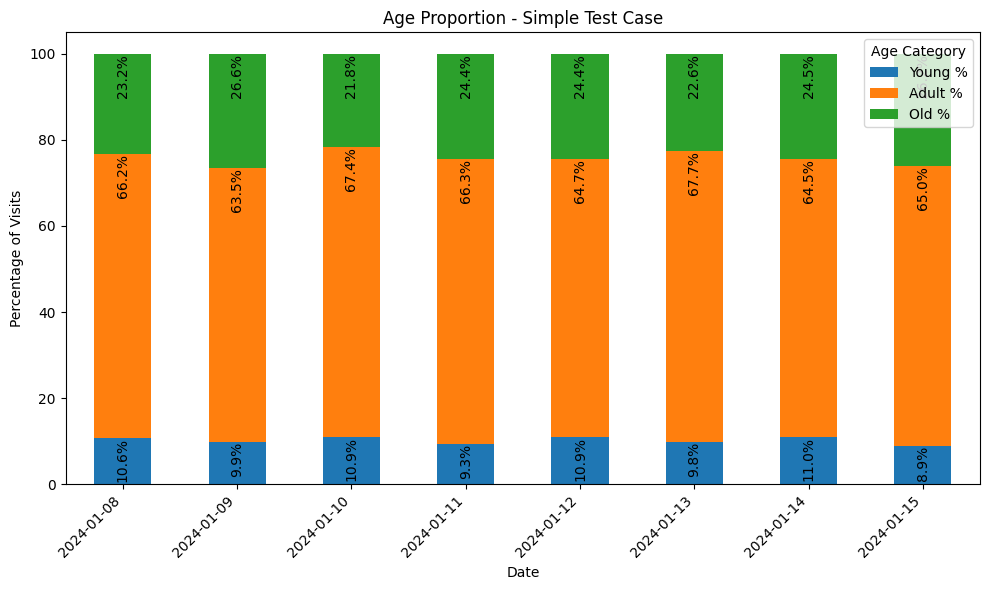

In [11]:
age_proportion = calculate_age_proportion(df_simple)
show_age_proportion(age_proportion, "Simple Test Case")

### Conclusions

1. The daily visits diagram indicates a variance for visits frequency based on the day of the week. An increase observed towards the end of the week with an explicit spike on Saturday.
2. The gender distribution diagram demonstrates a resembling across all days of the week representation of men and women among the visitors of the store.
3. The age proportion diagram illustrates a resembling representation of age groups throughout the week with a predominant presence of adults.

## Prepare Real Test Case

In [12]:
df_real = get_dataframe("datasets/real_test_case/")
df_real.head()

,id,gender,age,count,from_date,to_date,visit_date
0,440,man,old,5,2024-01-13 16:00:00,2024-01-13 17:00:00,2024-01-13
1,441,woman,young,84,2024-01-13 16:00:00,2024-01-13 17:00:00,2024-01-13
2,442,woman,adult,503,2024-01-13 16:00:00,2024-01-13 17:00:00,2024-01-13
3,443,woman,old,7,2024-01-13 16:00:00,2024-01-13 17:00:00,2024-01-13
4,444,man,young,130,2024-01-13 17:00:00,2024-01-13 18:00:00,2024-01-13


In [13]:
df_real["visit_date"].nunique()

28

In [14]:
df_real["visit_date"].value_counts().sort_index()

visit_date
2024-01-08    84
2024-01-09    84
2024-01-10    84
2024-01-11    84
2024-01-12    84
2024-01-13    84
2024-01-14    84
2024-01-15    84
2024-01-16    84
2024-01-17    84
2024-01-18    84
2024-01-19    84
2024-01-20    84
2024-01-21    84
2024-01-22    84
2024-01-23    84
2024-01-24    84
2024-01-25    84
2024-01-26    84
2024-01-27    84
2024-01-28    84
2024-01-29    84
2024-01-30    84
2024-01-31    84
2024-02-01    84
2024-02-02    84
2024-02-03    84
2024-02-04    84
Name: count, dtype: int64

In [15]:
df_real.isna().sum()

id            0
gender        0
age           0
count         0
from_date     0
to_date       0
visit_date    0
dtype: int64

### Conclusions 
The dataset contains records for every hour spanning from 8:00 to 22:00 across six distinct age/gender groups for 28 consecutive days (4 weeks). The records have no null values. The data is consistent and ready for further analysis without any additional preparation steps.

## Analyze Real Test Case

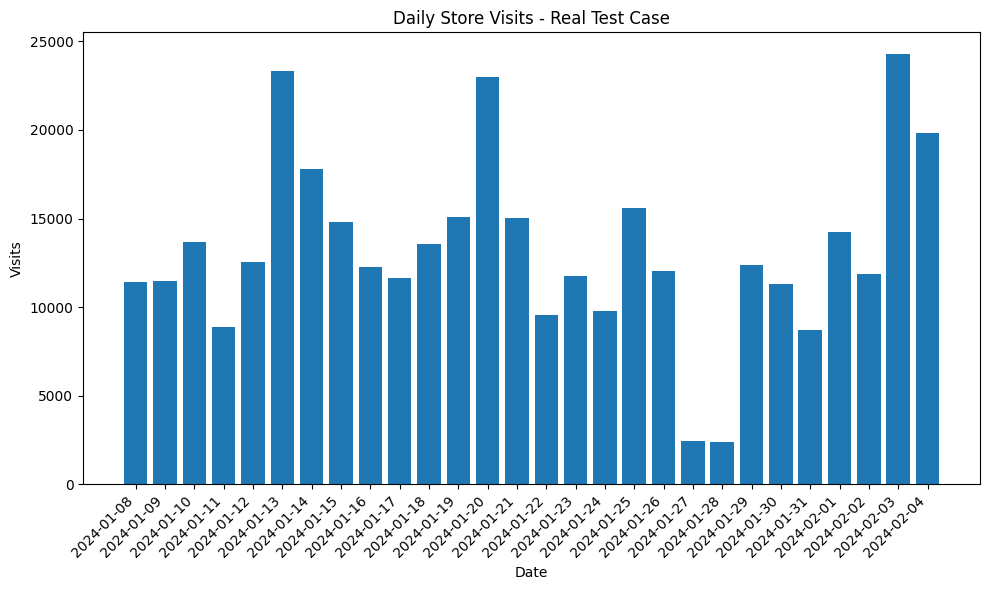

In [16]:
daily_visits = calculate_daily_visits(df_real)
show_daily_visits(daily_visits, "Real Test Case")

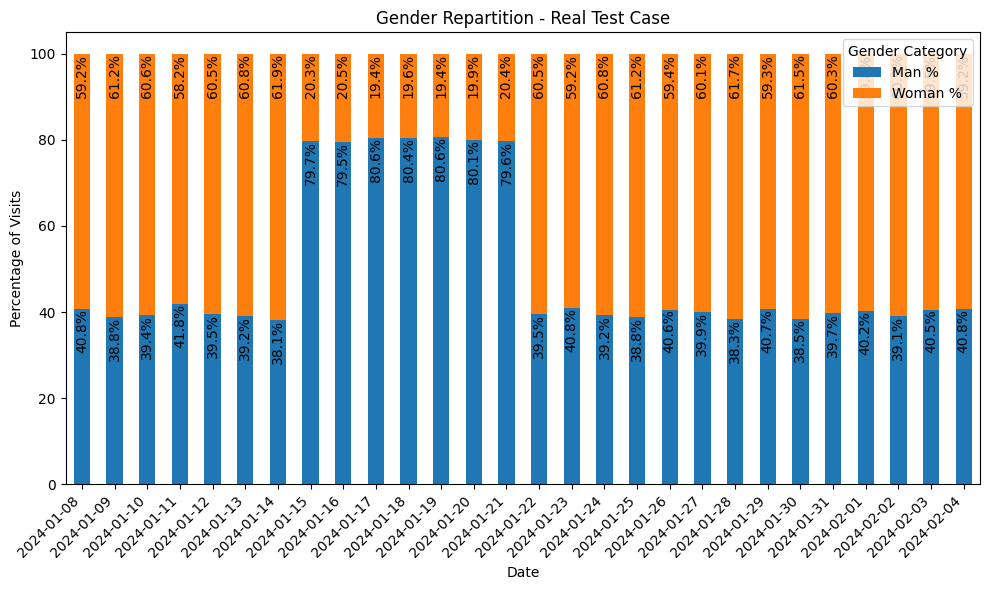

In [17]:
gender_repartition = calculate_gender_repartition(df_real)
show_gender_repartition(gender_repartition, "Real Test Case")

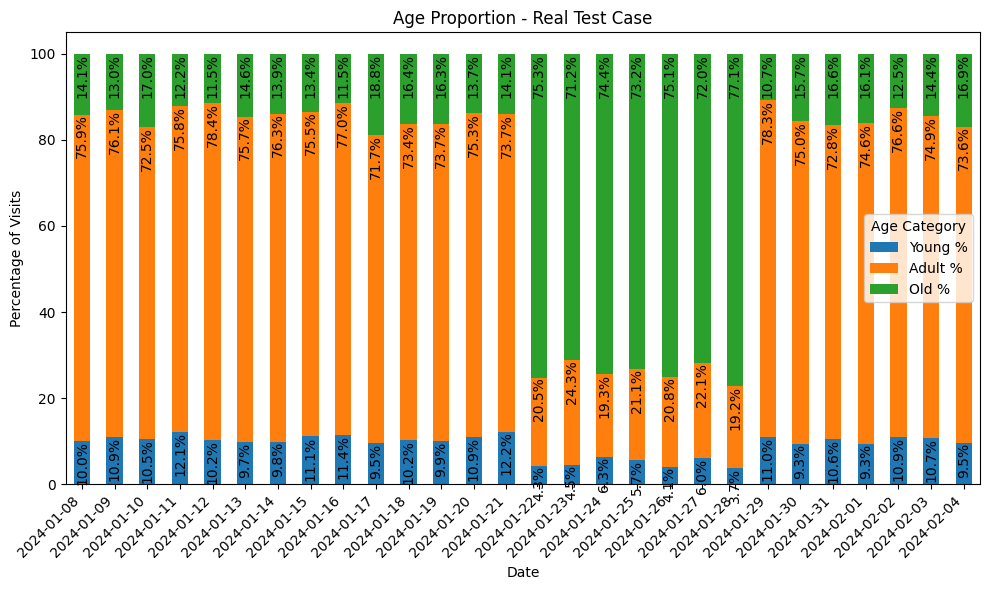

In [18]:
age_proportion = calculate_age_proportion(df_real)
show_age_proportion(age_proportion, "Real Test Case")

### Conclusions

1. The daily visits diagram reveals a consistent correlation between visit frequency and the day of the week, mirroring observations from the Simple Test Case dataset. However significant deviation from the normal values is apparent on January 27 and January 28 (Saturday and Sunday respectively), suggesting potential data anomalies that require further investigation.
3. The gender distribution diagram demonstrates an anticipated balance of men and women visiting the store across most days, with the exception of the 2nd week of observation. During this period a notable increase in the number of men compared to women indicating a potential data anomalies.
4. The age proportion diagram illustrates a similar distribution of age groups with an exception noted in the 3rd week of observation. There is an increase in the number of old visitors to the store deviating from the usual pattern.